# Task 3 - DBSCAN Clustering

## Packages
Importing needed libraries

In [48]:
%matplotlib inline
import math
import pandas as pd
import csv
import numpy as np
from numpy import genfromtxt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Task 3a

## Plotting function

In [49]:
def plot_clusters(data):
    """
    Shows a scatter plot with the data points clustered.
    """
    # get cluster ids from the data
    cluster_ids = []
    for p in data_points:
        cluster_ids.append(p.cluster_id)

    # load data
    labels = cluster_ids
    data_df = pd.read_csv ('points_dbscan.csv', header=0, usecols=['x', 'y'])
    data = data_df.values
    X = data

    print(f"labels: {labels}")

    # generate colors for graphing points (noise is marked with black, clusters are marked with distinct colors)
    color_palette = {
        -1: '#000000', # black
        1: '#deeb34', # yellow
        2: '#eb3434', # red
        3: '#34eb46', # green
        4: '#eb34d9', # pink
        5: '#344feb' # blue
    }
    colors = list(map(lambda x: color_palette[x], labels))
    
    # Generate scatter plot for training data
    plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
    plt.title('clustered data')
    plt.xlabel('Axis X')
    plt.ylabel('Axis y')
    plt.show()

## Loading the data

In [50]:
data_df = pd.read_csv ('points_dbscan.csv', header=0)
data = data_df.values
print(data)

[[ 0 14  1]
 [ 1  1  8]
 [ 2  3 12]
 [ 3  5  1]
 [ 4 13 11]
 [ 5 12  6]
 [ 6  4 12]
 [ 7  1  8]
 [ 8  8  3]
 [ 9  5  1]
 [10 14 12]
 [11 12  9]
 [12  4  5]
 [13  8  4]
 [14  2  3]]


## Defining a data point class

In [51]:
class Data_point:
    def __init__(self, id, x, y) -> None:
        self.id: int = id
        self.x: float = x
        self.y: float = y
        self.cluster_id: int = None
        self.edges = []
        self.type: str = '' # core / border / noise

    def __str__(self) -> str:
        return f"id:{self.id}, x:{self.x}, y:{self.y}, cluster_id:{self.cluster_id}, type:{self.type}"

## Implementing euclidean distance (L2)

In [52]:
def euclidian_distance(p: Data_point, q: Data_point):
    return math.sqrt((p.x-q.x)**2 + (p.y-q.y)**2)

# Implementing the DBSCAN clustering algorithm

In [53]:
class Graph:
    def __init__(self):
        self.max_cluster_id = 0

    def dbscan_clustering(self, data, eps=4, min_points=3):
        """
        Description: 
            DBSCAN clustering algorithm.
        Parameters:
            data: data points
            eps: (epsilon) radius of area being observed by each data point
        Returns:
            Array of clustered data points
        """
        # convert from list to nodes
        data_points = []
        for p in data:
            data_points.append(Data_point(p[0], p[1], p[2]))
            
        # enumerate all point combinations
        p: Data_point; q: Data_point
        for i, p in enumerate(data_points):
            points_within_eps = 0
            for j, q in enumerate(data_points):
                if i == j: continue
                if euclidian_distance(p, q) <= eps:
                    points_within_eps += 1
            # find core and border points
            if points_within_eps >= min_points:
                p.type = 'core'
                if q.type != 'core':
                    q.type = 'border'
            # find noise points
            elif points_within_eps < min_points and p.type != 'border':
                p.type = 'noise'
        

        # put edge between overlapping core points
        for i, p in enumerate(data_points):
            if p.type == 'core':
                for j, q in enumerate(data_points):
                    if i == j: continue
                    if euclidian_distance(p, q) <= eps:
                        if q.type == 'core':
                            p.edges.append(q)


        # assign cluster ids
        for i, p in enumerate(data_points):
            if p.type == 'core':
                self.assign_cluster_id(p)


        # assign each border point to one of the clusters
        for i, p in enumerate(data_points):
            if p.type == 'border':
                closest_core = float('inf')
                for j, q in enumerate(data_points):
                    if euclidian_distance(p, q) < closest_core:
                        q = closest_core
                p.cluster_id = q.cluster_id


        # assign cluster_id -1 to noise points
        for p in data_points:
            if p.type == 'noise':
                p.cluster_id = -1


        return data_points


    def assign_cluster_id(self, p: Data_point, increment_cluster_id=True):
        """
        Assigns all connected cores to the same given cluster id. 
        Cluster id is only incremented on the first node in a cluster.
        """
        q: Data_point
        if p.cluster_id is not None: return
        if increment_cluster_id:
            self.max_cluster_id += 1
        p.cluster_id = self.max_cluster_id
        for q in p.edges:
            self.assign_cluster_id(q, False)
        return

## Running the implemented code

id:0, x:14, y:1, cluster_id:-1, type:noise
id:1, x:1, y:8, cluster_id:-1, type:noise
id:2, x:3, y:12, cluster_id:-1, type:noise
id:3, x:5, y:1, cluster_id:1, type:core
id:4, x:13, y:11, cluster_id:-1, type:noise
id:5, x:12, y:6, cluster_id:-1, type:noise
id:6, x:4, y:12, cluster_id:-1, type:noise
id:7, x:1, y:8, cluster_id:-1, type:noise
id:8, x:8, y:3, cluster_id:1, type:core
id:9, x:5, y:1, cluster_id:1, type:core
id:10, x:14, y:12, cluster_id:-1, type:noise
id:11, x:12, y:9, cluster_id:2, type:core
id:12, x:4, y:5, cluster_id:-1, type:noise
id:13, x:8, y:4, cluster_id:-1, type:noise
id:14, x:2, y:3, cluster_id:1, type:core
labels: [-1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 2, -1, -1, 1]


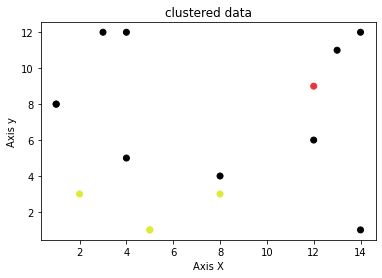

In [54]:
graph = Graph()
data_points = graph.dbscan_clustering(data)

p: Data_point
for p in data_points:
    print(p)

plot_clusters(data)

# Task 3b - Implementation using online code

[-1 -1 -1  0  1  1 -1 -1  0  0  1  1  0  0  0]


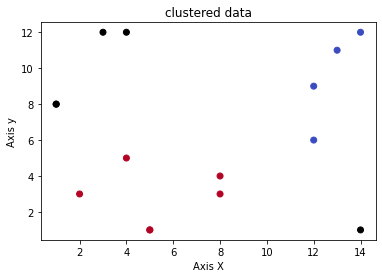

In [55]:
# https://github.com/christianversloot/machine-learning-articles/blob/main/performing-dbscan-clustering-with-python-and-scikit-learn.md

# Configuration options
epsilon = 4.0
min_samples = 3

# Load data
data_df = pd.read_csv ('points_dbscan.csv', header=0, usecols=['x', 'y'])
data = data_df.values
X = data
np.save('./clusters.npy', X)
X = np.load('./clusters.npy')

# Compute DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = db.labels_
print(f"labels: {labels}")

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else ('#000000' if x == -1 else '#b40426'), labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('clustered data')
plt.xlabel('Axis X')
plt.ylabel('Axis y')
plt.show()

# Results
Our results from task 3a seem to vary a bit from our verified results in task 3b, likely due to some bug we were not able to find:

|                  |    |    |    |   |    |    |    |    |   |   |    |   |    |    |   |
|------------------|----|----|----|---|----|----|----|----|---|---|----|---|----|----|---|
| Our results      | -1 | -1 | -1 | 1 | -1 | -1 | -1 | -1 | 1 | 1 | -1 | 2 | -1 | -1 | 1 |
| Verified results | -1 | -1 | -1 | 0 | 1  | 1  | -1 | -1 | 0 | 0 | 1  | 1 | 0  | 0  | 0 |

Clusters 0 and 1 seem to have been swapped between the different implementations. Normalizing for this, we get the slightly better results:

|                  |    |    |    |   |    |    |    |    |   |   |    |   |    |    |   |
|------------------|----|----|----|---|----|----|----|----|---|---|----|---|----|----|---|
| Our results      | -1 | -1 | -1 | 0 | -1 | -1 | -1 | -1 | 0 | 0 | -1 | 2 | -1 | -1 | 0 |
| Verified results | -1 | -1 | -1 | 0 | 1  | 1  | -1 | -1 | 0 | 0 | 1  | 1 | 0  | 0  | 0 |

Task 3b was done both in python and KNIME, and was equal in both cases.